In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
APD_2013 = "APD_Data/2013_APD_Traffic_Fatalities.csv"
APD_2014 = "APD_Data/2014_APD_Traffic_Fatalities.csv"
APD_2015 = "APD_Data/2015_APD_Traffic_Fatalities.csv"
APD_2016 = "APD_Data/2016_APD_Traffic_Fatalities.csv"
APD_2017 = "APD_Data/2017_APD_Traffic_Fatalities.csv"
APD_2018 = "APD_Data/2018_APD_Traffic_Fatality_Data_021219.csv"


APD_2013_df = pd.read_csv(APD_2013)
APD_2014_df = pd.read_csv(APD_2014)
APD_2015_df = pd.read_csv(APD_2015)
APD_2016_df = pd.read_csv(APD_2016)
APD_2017_df = pd.read_csv(APD_2017)
APD_2018_df = pd.read_csv(APD_2018)

In [3]:
APD_2013_df = APD_2013_df.drop(['FATAL CRASH #', 'Related','CASE NUMBER', 'AREA',  'FTSRA', 'TYPE OF ROAD'], axis=1)
APD_2013_df = APD_2013_df.rename(columns={"LOCATION": "Location", "speed": "Speeding",'Ran Red Light': 'Ran Red Light or Stop Sign',  'restraint or helmet': 'Restraint Type', 'XCOORD': 'X COORD', 'YCOORD': 'Y COORD', 'Killed: Driver/Pass':'Victim', 'SUSPECTED IMPAIRMENT': 'Suspected Impairment'})

In [4]:
APD_2014_df = APD_2014_df.drop(['FATAL CRASH #', 'CASE NUMBER', 'AREA', 'Related', 'FTSRA', 'TYPE OF ROAD', 'Charge'], axis=1)
APD_2014_df = APD_2014_df.rename(columns={'TYPE': "Type","LOCATION": "Location",'Ran Red Light': 'Ran Red Light or Stop Sign', 'restraint or helmet': 'Restraint Type', 'Killed: Driver/Pass':'Victim', 'SUSPECTED IMPAIRMENT': 'Suspected Impairment'})

In [5]:
APD_2015_df = APD_2015_df.drop(['FATAL CRASH #', 'CASE NUMBER', 'AREA', 'Related', 'FTSRA', 'TYPE OF ROAD', 'charge'], axis=1)
APD_2015_df = APD_2015_df.rename(columns={'TYPE': "Type","LOCATION": "Location",'Ran Red Light': 'Ran Red Light or Stop Sign',  'restraint or helmet': 'Restraint Type','Killed: driver/pass':'Victim', 'DL Status':'Drivers License Status','SUSPECTED IMPAIRMENT': 'Suspected Impairment'})

In [6]:
APD_2016_df = APD_2016_df.drop(['FATAL CRASH Number', 'CASE NUMBER', 'AREA', 'Related', 'FTSRA',  'TYPE OF ROAD',  'Victim', 'charge'], axis=1)
APD_2016_df = APD_2016_df.rename(columns={'TYPE': "Type","LOCATION": "Location",'restraint or helmet': 'Restraint Type', 'COORD X' : 'X COORD','DL Status':'Drivers License Status','SUSPECTED IMPAIRMENT': 'Suspected Impairment'})

In [7]:
APD_2017_df = APD_2017_df.drop(['Fatal crash number','Charge', 'DL status incident ', 'Related','Case Number', 'Area', 'Type of road', 'Failure to stop and render aid', ],axis=1)
APD_2017_df = APD_2017_df.rename(columns={'Restraint helmet': 'Restraint Type', 'Ran red light or stop sign': 'Ran Red Light or Stop Sign', 'X coord' : 'X COORD', 'Y coord': 'Y COORD', 'Killed driver pass': 'Victim','DL status incident':'Drivers License Status'})

In [8]:
APD_2018_df = APD_2018_df.drop(['Fatal Crash Number','Case Number', 'Area', 'Case Status','Failure to stop and render aid', 'Related', 'charge', 'Type of road'],axis=1)
APD_2018_df = APD_2018_df.rename(columns={ 'Restraint type': 'Restraint Type', 'X coord':'X COORD', 'Y coord': 'Y COORD', 'Killed driver pass': 'Victim','DL Status incident':'Drivers License Status'})

In [9]:
all_merged_df1 = pd.merge(APD_2013_df, APD_2014_df, how='outer')

In [10]:
all_merged_df2 = pd.merge(all_merged_df1, APD_2015_df, how='outer')

In [11]:
all_merged_df3 = pd.merge(all_merged_df2, APD_2016_df, how='outer')

In [12]:
all_merged_df4 = pd.merge(all_merged_df3, APD_2017_df, how='outer')

In [13]:
all_merged_df = pd.merge(all_merged_df4, APD_2018_df, how='outer')

In [14]:
all_merged_df.Type.str.title()
all_merged_df

,Type,Number of Fatalities,Location,Date,Month,Day,Hour,Time,Victim,Speeding,Ran Red Light or Stop Sign,Drivers License Status,Suspected Impairment,Restraint Type,X COORD,Y COORD
0,Motorcycle,2,1100 Berger St,01/01/2013,Jan,Tue,18,18:50:00,Driver and Passenger,NaN,N,suspended license for many years for DWLI also...,Driver,no helmet,-97.687880,30.269347
1,Motor Vehicle,1,12600 S. IH 35 NB proper,01/03/2013,Jan,Thu,4,04:10:00,Passenger,NaN,N,okay,NONE,seatbelt worn,-97.803716,30.120220
2,Motor Vehicle,1,5000 Sara Dr,01/08/2013,Jan,Tue,7,07:30:00,Driver,NaN,N,suspended license for many years for DWLI and ...,Driver,seatbelt worn,-97.687103,30.267664
3,Motor Vehicle,1,10300 Block S. IH35 NB,01/15/2013,Jan,Tue,11,11:31:00,Driver,NaN,N,suspended license,NONE,unknown,-97.791976,30.151241
4,Motor Vehicle,1,6500 Block Northeast Dr,01/18/2013,Jan,Fri,15,15:28:00,Driver,x,N,suspended license,Driver,no seatbelt,-97.681544,30.315898
5,Motorcycle,1,12500 Block Lamplight Village,01/19/2013,Jan,Sat,17,17:08:00,MC Driver,NaN,N,suspended license,Driver,helmet,-97.695888,30.415821
6,Motor Vehicle,1,8500 Georgian Dr,01/10/2013,Jan,Thu,4,04:03:00,Driver,x,N,No license. Driver 15.,NONE,unknown,-97.700756,30.351081
7,Motor Vehicle,1,1500 Block E. Howard,01/30/2013,Jan,Wed,0,00:28:00,Driver,x,N,okay,Driver,no seatbelt,-97.642155,30.406236
8,Pedestrian,1,4300 Block S. 1st St.,02/02/2013,Feb,Sat,20,20:52:00,Pedestrian,NaN,N,okay,Pedestrian,NaN,-97.771590,30.223113
9,Pedestrian,1,4400 BLK N MoPac Expy SB,02/06/2013,Feb,Wed,20,20:10:10,Pedestrian,NaN,N,okay,Pedestrian,NaN,-97.756330,30.318529


In [15]:
APD_2013_df = APD_2013_df.replace({"MOTOR VEHICLE": "Motor Vehicle", "BICYCLE": "Bicycle"}) 
APD_2014_df = APD_2014_df.replace({"MOTOR VEHICLE": "Motor Vehicle", "BICYCLE": "Bicycle"})
APD_2015_df = APD_2015_df.replace({"MOTOR VEHICLE": "Motor Vehicle", "BICYCLE": "Bicycle"})
APD_2016_df = APD_2016_df.replace({"MOTOR VEHICLE": "Motor Vehicle", "BICYCLE": "Bicycle"})
APD_2017_df = APD_2017_df.replace({"MOTOR VEHICLE": "Motor Vehicle", "BICYCLE": "Bicycle"})
APD_2018_df = APD_2018_df.replace({"MOTOR VEHICLE": "Motor Vehicle", "BICYCLE": "Bicycle"})
all_merged_df = all_merged_df.replace({"MOTOR VEHICLE": "Motor Vehicle", "BICYCLE": "Bicycle"}) 

In [16]:
counts_2013 = APD_2013_df.Type.value_counts()
counts_2014 = APD_2014_df.Type.value_counts()
counts_2015 = APD_2015_df.Type.value_counts()
counts_2016 = APD_2016_df.Type.value_counts()
counts_2017 = APD_2017_df.Type.value_counts()
counts_2018 = APD_2018_df.Type.value_counts()
counts = pd.DataFrame(counts_2014)

counts.insert(0, "2013", counts_2013)
counts.insert(2, "2015", counts_2015)
counts.insert(3, "2016", counts_2016)
counts.insert(4, "2017", counts_2017)
counts.insert(5, "2018", counts_2018)
counts.reset_index(drop=False, inplace=True)

In [17]:
counts.columns = ["Vehicle Type", "2013", "2014", "2015", "2016", "2017", "2018"]
counts[("2013")].fillna(0).astype(float)
pd.options.display.float_format = '{:,.0f}'.format
counts

,Vehicle Type,2013,2014,2015,2016,2017,2018
0,Motor Vehicle,39,28,47,34,33,31
1,Pedestrian,22,15,29,28,23,31
2,Motorcycle,10,13,15,13,11,9
3,18 Wheeler,nan,2,nan,nan,nan,nan
4,Bicycle,1,1,2,2,4,2


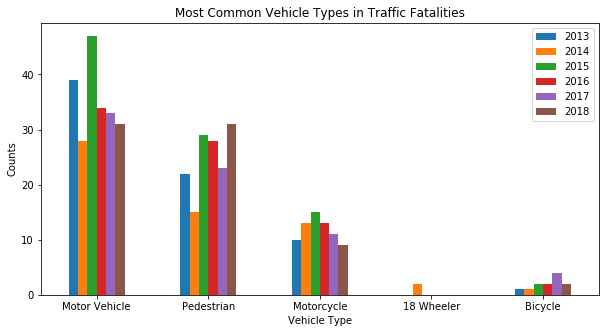

<Figure size 432x288 with 0 Axes>

In [18]:
vehicles = counts.plot(kind="bar", figsize=(10,5))
vehicles.set_xticklabels(counts["Vehicle Type"], rotation=0)
plt.title("Most Common Vehicle Types in Traffic Fatalities")
plt.xlabel("Vehicle Type")
plt.ylabel("Counts")
plt.show()
plt.tight_layout()
plt.savefig("../Vehicle_types.png")

In [19]:
all_merged_df

,Type,Number of Fatalities,Location,Date,Month,Day,Hour,Time,Victim,Speeding,Ran Red Light or Stop Sign,Drivers License Status,Suspected Impairment,Restraint Type,X COORD,Y COORD
0,Motorcycle,2,1100 Berger St,01/01/2013,Jan,Tue,18,18:50:00,Driver and Passenger,NaN,N,suspended license for many years for DWLI also...,Driver,no helmet,-98,30
1,Motor Vehicle,1,12600 S. IH 35 NB proper,01/03/2013,Jan,Thu,4,04:10:00,Passenger,NaN,N,okay,NONE,seatbelt worn,-98,30
2,Motor Vehicle,1,5000 Sara Dr,01/08/2013,Jan,Tue,7,07:30:00,Driver,NaN,N,suspended license for many years for DWLI and ...,Driver,seatbelt worn,-98,30
3,Motor Vehicle,1,10300 Block S. IH35 NB,01/15/2013,Jan,Tue,11,11:31:00,Driver,NaN,N,suspended license,NONE,unknown,-98,30
4,Motor Vehicle,1,6500 Block Northeast Dr,01/18/2013,Jan,Fri,15,15:28:00,Driver,x,N,suspended license,Driver,no seatbelt,-98,30
5,Motorcycle,1,12500 Block Lamplight Village,01/19/2013,Jan,Sat,17,17:08:00,MC Driver,NaN,N,suspended license,Driver,helmet,-98,30
6,Motor Vehicle,1,8500 Georgian Dr,01/10/2013,Jan,Thu,4,04:03:00,Driver,x,N,No license. Driver 15.,NONE,unknown,-98,30
7,Motor Vehicle,1,1500 Block E. Howard,01/30/2013,Jan,Wed,0,00:28:00,Driver,x,N,okay,Driver,no seatbelt,-98,30
8,Pedestrian,1,4300 Block S. 1st St.,02/02/2013,Feb,Sat,20,20:52:00,Pedestrian,NaN,N,okay,Pedestrian,NaN,-98,30
9,Pedestrian,1,4400 BLK N MoPac Expy SB,02/06/2013,Feb,Wed,20,20:10:10,Pedestrian,NaN,N,okay,Pedestrian,NaN,-98,30


In [20]:
all_merged_df = all_merged_df.replace({'n':'N', 'y':'Y'})

In [21]:
speeding = all_merged_df.Speeding.value_counts()
speeding

N            229
Y            114
unk           25
x             16
suspected      1
pending        1
Name: Speeding, dtype: int64

In [22]:
speeding_y = speeding['Y']
speeding_tot = speeding['Y']+speeding['N']+speeding['unk']+speeding['x']+speeding['pending']+speeding['suspected']
speeding_y_per = (speeding_y/len(all_merged_df['Restraint Type']))*100
speeding_y_per

25.617977528089884

In [23]:
red_light = all_merged_df['Ran Red Light or Stop Sign'].value_counts()
red_light

N      402
Y       35
no       4
unk      3
Name: Ran Red Light or Stop Sign, dtype: int64

In [24]:
red_light_y = red_light['Y']
red_light_tot = red_light['Y']+red_light['N']+red_light['unk']+red_light['no']
red_light_per = (red_light_y/len(all_merged_df['Restraint Type']))*100
red_light_per

7.865168539325842

In [25]:
all_merged_df["Suspected Impairment"].str.lower()
impairments = all_merged_df['Suspected Impairment'].str.lower()
sus_impairment = impairments.replace({"none": "none", "none (pending)": "none"})
impairment = sus_impairment.value_counts()
impairment

none                                         160
driver                                       154
ped                                           49
pedestrian                                    23
driver (pending)                               7
mc driver                                      7
unknown                                        4
driver                                         4
ped (pending)                                  4
none                                           4
driver                                         3
ped                                            3
ped                                            2
unknown                                        2
bicyclist                                      2
unk                                            2
both drivers                                   2
both                                           1
both peds                                      1
ped and driver                                 1
driver/bicyclist    

In [26]:
impaired_per = (1-(impairment['none']/len(all_merged_df['Restraint Type'])))*100
impaired_per

64.04494382022472

In [27]:
all_merged_df['Restraint Type'].str.lower()
restraints = all_merged_df['Restraint Type'].replace({"seatbelts worn": "seatbelt worn", "no seatbelts": "no seatbelt", "no seatbelt/ 1 worn": "no seatbelt", "no seatbelt (passenger)/ 3 worn": "no seatbelt", "no helmet (bike)": "no helmet", "no helmet (not strapped)": "no helmet", " no helmet": "no helmet", "helmet worn": "helmet"})

restraint_tot = restraints.value_counts()

restraint_tot

seatbelt worn            98
no seatbelt              71
no helmet                38
helmet                   38
unknown                  34
ok                        9
worn, but came off        1
yes                       1
no seatbelt               1
driver#2 had seatbelt     1
Name: Restraint Type, dtype: int64

In [28]:
no_restraint_per = ((restraint_tot["no seatbelt"]+restraint_tot["no helmet"])/len(all_merged_df['Restraint Type']))*100
no_restraint_per

24.49438202247191

In [29]:
percents = [speeding_y_per, red_light_per, impaired_per, no_restraint_per]
explode = (0,0,0.1,0)
labels = ["Speeding", "Ran Red Light", "Suspected Impairment", "No Seatbelt or Helmet"]

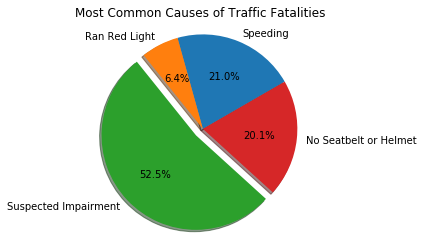

In [41]:
plt.pie(percents, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=30)
plt.axis("equal")
plt.title("Most Common Causes of Traffic Fatalities")
plt.savefig("../Most_common_causes.png")
plt.show()